Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

Import the data and check the first five records of the data

In [2]:
banking_data =  pd.read_csv("Bank_Personal_Loan_Modelling.csv")
banking_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# Removing spece between column name
banking_data.columns = ["id","age","experience","income","zipCode","family","ccAvg","education","mortgage","personalLoan","securitiesAccount","cdAccount","online","creditCard"]

In [4]:
banking_data.shape

(5000, 14)

Here we have given 5000 records and 14 column. Now let us analyse the data

In [5]:
# Here We do not require the column name id for further analysis . So I am dropping this column here
banking_data.drop(labels=["id"],inplace=True,axis=1)

In [6]:
banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
age                  5000 non-null int64
experience           5000 non-null int64
income               5000 non-null int64
zipCode              5000 non-null int64
family               5000 non-null int64
ccAvg                5000 non-null float64
education            5000 non-null int64
mortgage             5000 non-null int64
personalLoan         5000 non-null int64
securitiesAccount    5000 non-null int64
cdAccount            5000 non-null int64
online               5000 non-null int64
creditCard           5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


It shows the No. of records in each column with data type of that column and also shows whether there is any null value in any column

In [7]:
banking_data.isnull().sum()

age                  0
experience           0
income               0
zipCode              0
family               0
ccAvg                0
education            0
mortgage             0
personalLoan         0
securitiesAccount    0
cdAccount            0
online               0
creditCard           0
dtype: int64

Here we can say we do not have any null or blank record in our dataset

In [8]:
banking_data.describe()

,age,experience,income,zipCode,family,ccAvg,education,mortgage,personalLoan,securitiesAccount,cdAccount,online,creditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Here for continuous variables like Age , Experience where their Mean and Median is almost similar,we can say that data is some how normally distributed but for other continuous variable like Income , CCAvg,Mortgage there is huge difference between their Mean and Median value so data of these columns is not normally distributed because of some outliers in the data.

In Experience column it is showing minimum experience as -3 which is not possible in any case. So first let us check how many records are there with negative value of experience

In [9]:
banking_data[banking_data["experience"] <0]["experience"].count()

52

Out of total 5000 records there are 52 records with negative experience.So Here I am converting these negative value of experience variable into Positive value

In [10]:
banking_data["experience"] =  banking_data.apply(lambda x : abs(x["experience"]),axis=1)

Here Personal Loan column is our target column and rest are independent column. So lets analyse our target column with each independent column

In [11]:
banking_data["label"] =  banking_data.apply(lambda x: "Loan Accepted" if x["personalLoan"] == 1 else "Loan Rejected",axis=1)

In [12]:
personal_loan_count = banking_data["label"].value_counts()
personal_loan_count

Loan Rejected    4520
Loan Accepted     480
Name: label, dtype: int64

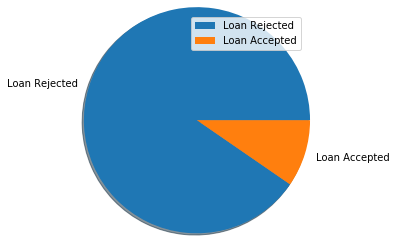

In [13]:
plt.pie(x = personal_loan_count.values,labels=personal_loan_count.keys(),shadow=True,radius=1.3)
plt.legend()
plt.show()

In [14]:
# Lets Find the unique value in colums
column_names= ["family","education","securitiesAccount","cdAccount","online","creditCard"]
unique_data = []
for names in column_names:
    print("Unique Values of", names ,banking_data[names].unique())

Unique Values of family [4 3 1 2]
Unique Values of education [1 2 3]
Unique Values of securitiesAccount [1 0]
Unique Values of cdAccount [0 1]
Unique Values of online [0 1]
Unique Values of creditCard [0 1]


In [15]:
def calculate_percentage(column_name):
    bar =  column_name.patches
    half =  int(len(bar)/2)
    left_bars = bar[:half]
    right_bars =  bar[half:]
    for left,right in zip(left_bars,right_bars):
        left_height =  left.get_height()
        right_height =  right.get_height()
        total_height = left_height + right_height
        column_name.text(x = left.get_x() + (left.get_width())/2 , y =  (left_height+40),s ='{0:.0%}'.format(left_height/total_height), ha="center")
        column_name.text(x = right.get_x() + (right.get_width())/2 , y = right_height + 40,s ='{0:.0%}'.format(right_height/total_height), ha="center")

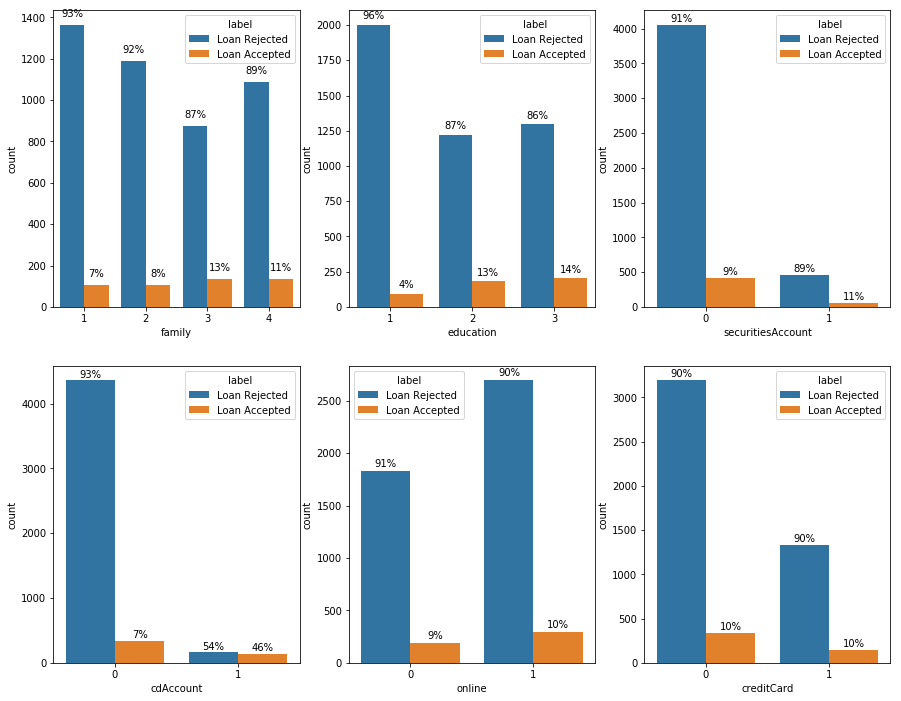

In [16]:
fig , ax = plt.subplots(nrows=2,ncols=3,figsize = (15,12))
k = 0
for i in np.arange(2):
    for j in np.arange(3):
            count_plot = sns.countplot(data=banking_data,x=column_names[k],hue="label",ax=ax[i][j])
            calculate_percentage(count_plot)
            k=k+1

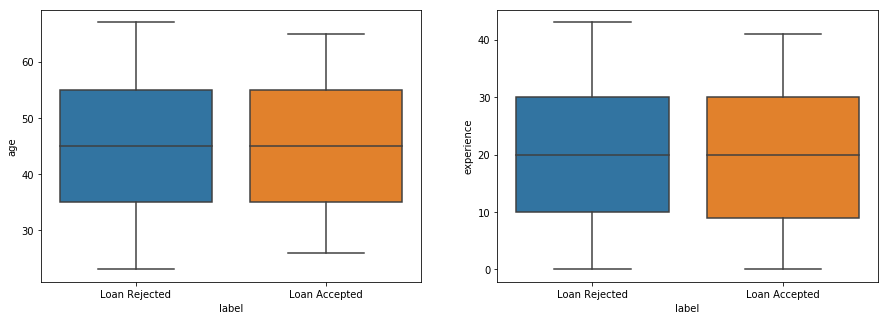

In [17]:
fig , ax = plt.subplots(nrows=1,ncols=2,figsize = (15,5),squeeze=False)
sns.boxplot(data=banking_data,y="age",x="label",ax=ax[0][0])
sns.boxplot(data=banking_data,y="experience",x="label",ax=ax[0][1])

From the above boxplot we can conclude that there is not much effect of Age and Experience on the customer's choice of Accepting or Rejecting the Personal Loan Because Q1 , median value and Q3 values are almost simlilar in both cases.

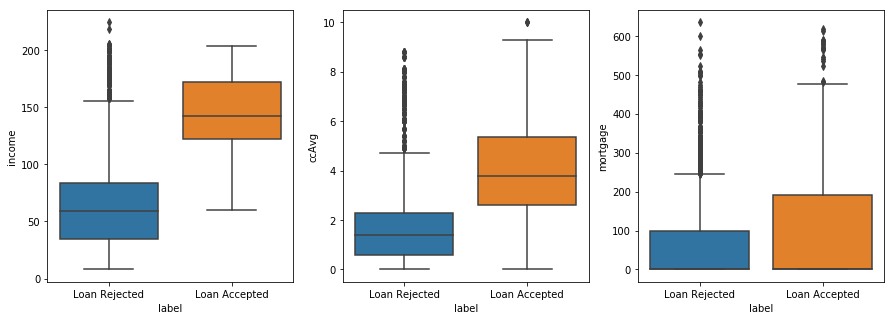

In [18]:
fig , ax = plt.subplots(nrows=1,ncols=3,figsize = (15,5),squeeze=False)
sns.boxplot(data=banking_data,y="income",x="label",ax=ax[0][0])
sns.boxplot(data=banking_data,y="ccAvg",x="label",ax=ax[0][1])
sns.boxplot(data=banking_data,y="mortgage",x="label",ax=ax[0][2])

Income has huge effect on accepting or rejecting the loan. Here we can see People with Low income has rejected the loan whereas people with high income accepted the loan. In the same way Customers who have more average spending on credit cards accepted the loan in the previous campaign. In case of Mortgage,more Customers who have more value of mortgage with the bank chose to go for Personal Loan compare to those who have less value of mortgage with the bank 

In [19]:
len(banking_data["zipCode"].unique())

467

In this file of 5000 records we have 467 different types of ZIP Codes. let see maximum customers belong to which location who accepted or rejected the personal loan in the last campaign

In [20]:
# Showing top 10 records of zip code with maximum people accepted the loan in the previous campaign
loan_accepted_zip_code = pd.crosstab(index=banking_data["zipCode"],columns=banking_data["label"]).sort_values(by="Loan Accepted",ascending =  False).head(10)
loan_accepted_zip_code

label,Loan Accepted,Loan Rejected
zipCode,,
94720,19,150
94305,13,114
92093,9,42
90089,8,38
90095,8,63
94304,8,37
92182,7,25
95051,6,28
95616,6,110


In [21]:
# Showing top 10 records zip code with maximum people rejected the loan in the previous campaign
loan_rejected_zip_code = pd.crosstab(index=banking_data["zipCode"],columns=banking_data["label"]).sort_values(by="Loan Rejected",ascending =  False).head(10)
loan_rejected_zip_code

label,Loan Accepted,Loan Rejected
zipCode,,
94720,19,150
94305,13,114
95616,6,110
90095,8,63
93106,4,53
91320,2,51
93943,4,50
92037,5,49
90024,1,49


In [22]:
banking_df =  banking_data.drop(labels="zipCode",axis=1)

Here I am not going to consider zip code column for further analysis because there are 467 types of zip codes in given data and machine learning will take zipcode into mathematics calculation like 94720 zip code is greater than 94305 which is not actually the case. If I go for label encoding and OneHotEncoder then i will have 467 new column that means 1 column for each zip code then again my model will face the curse of dimensionality. so it is better to not to take this column for further analysis. 

C:\Users\aman-pc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


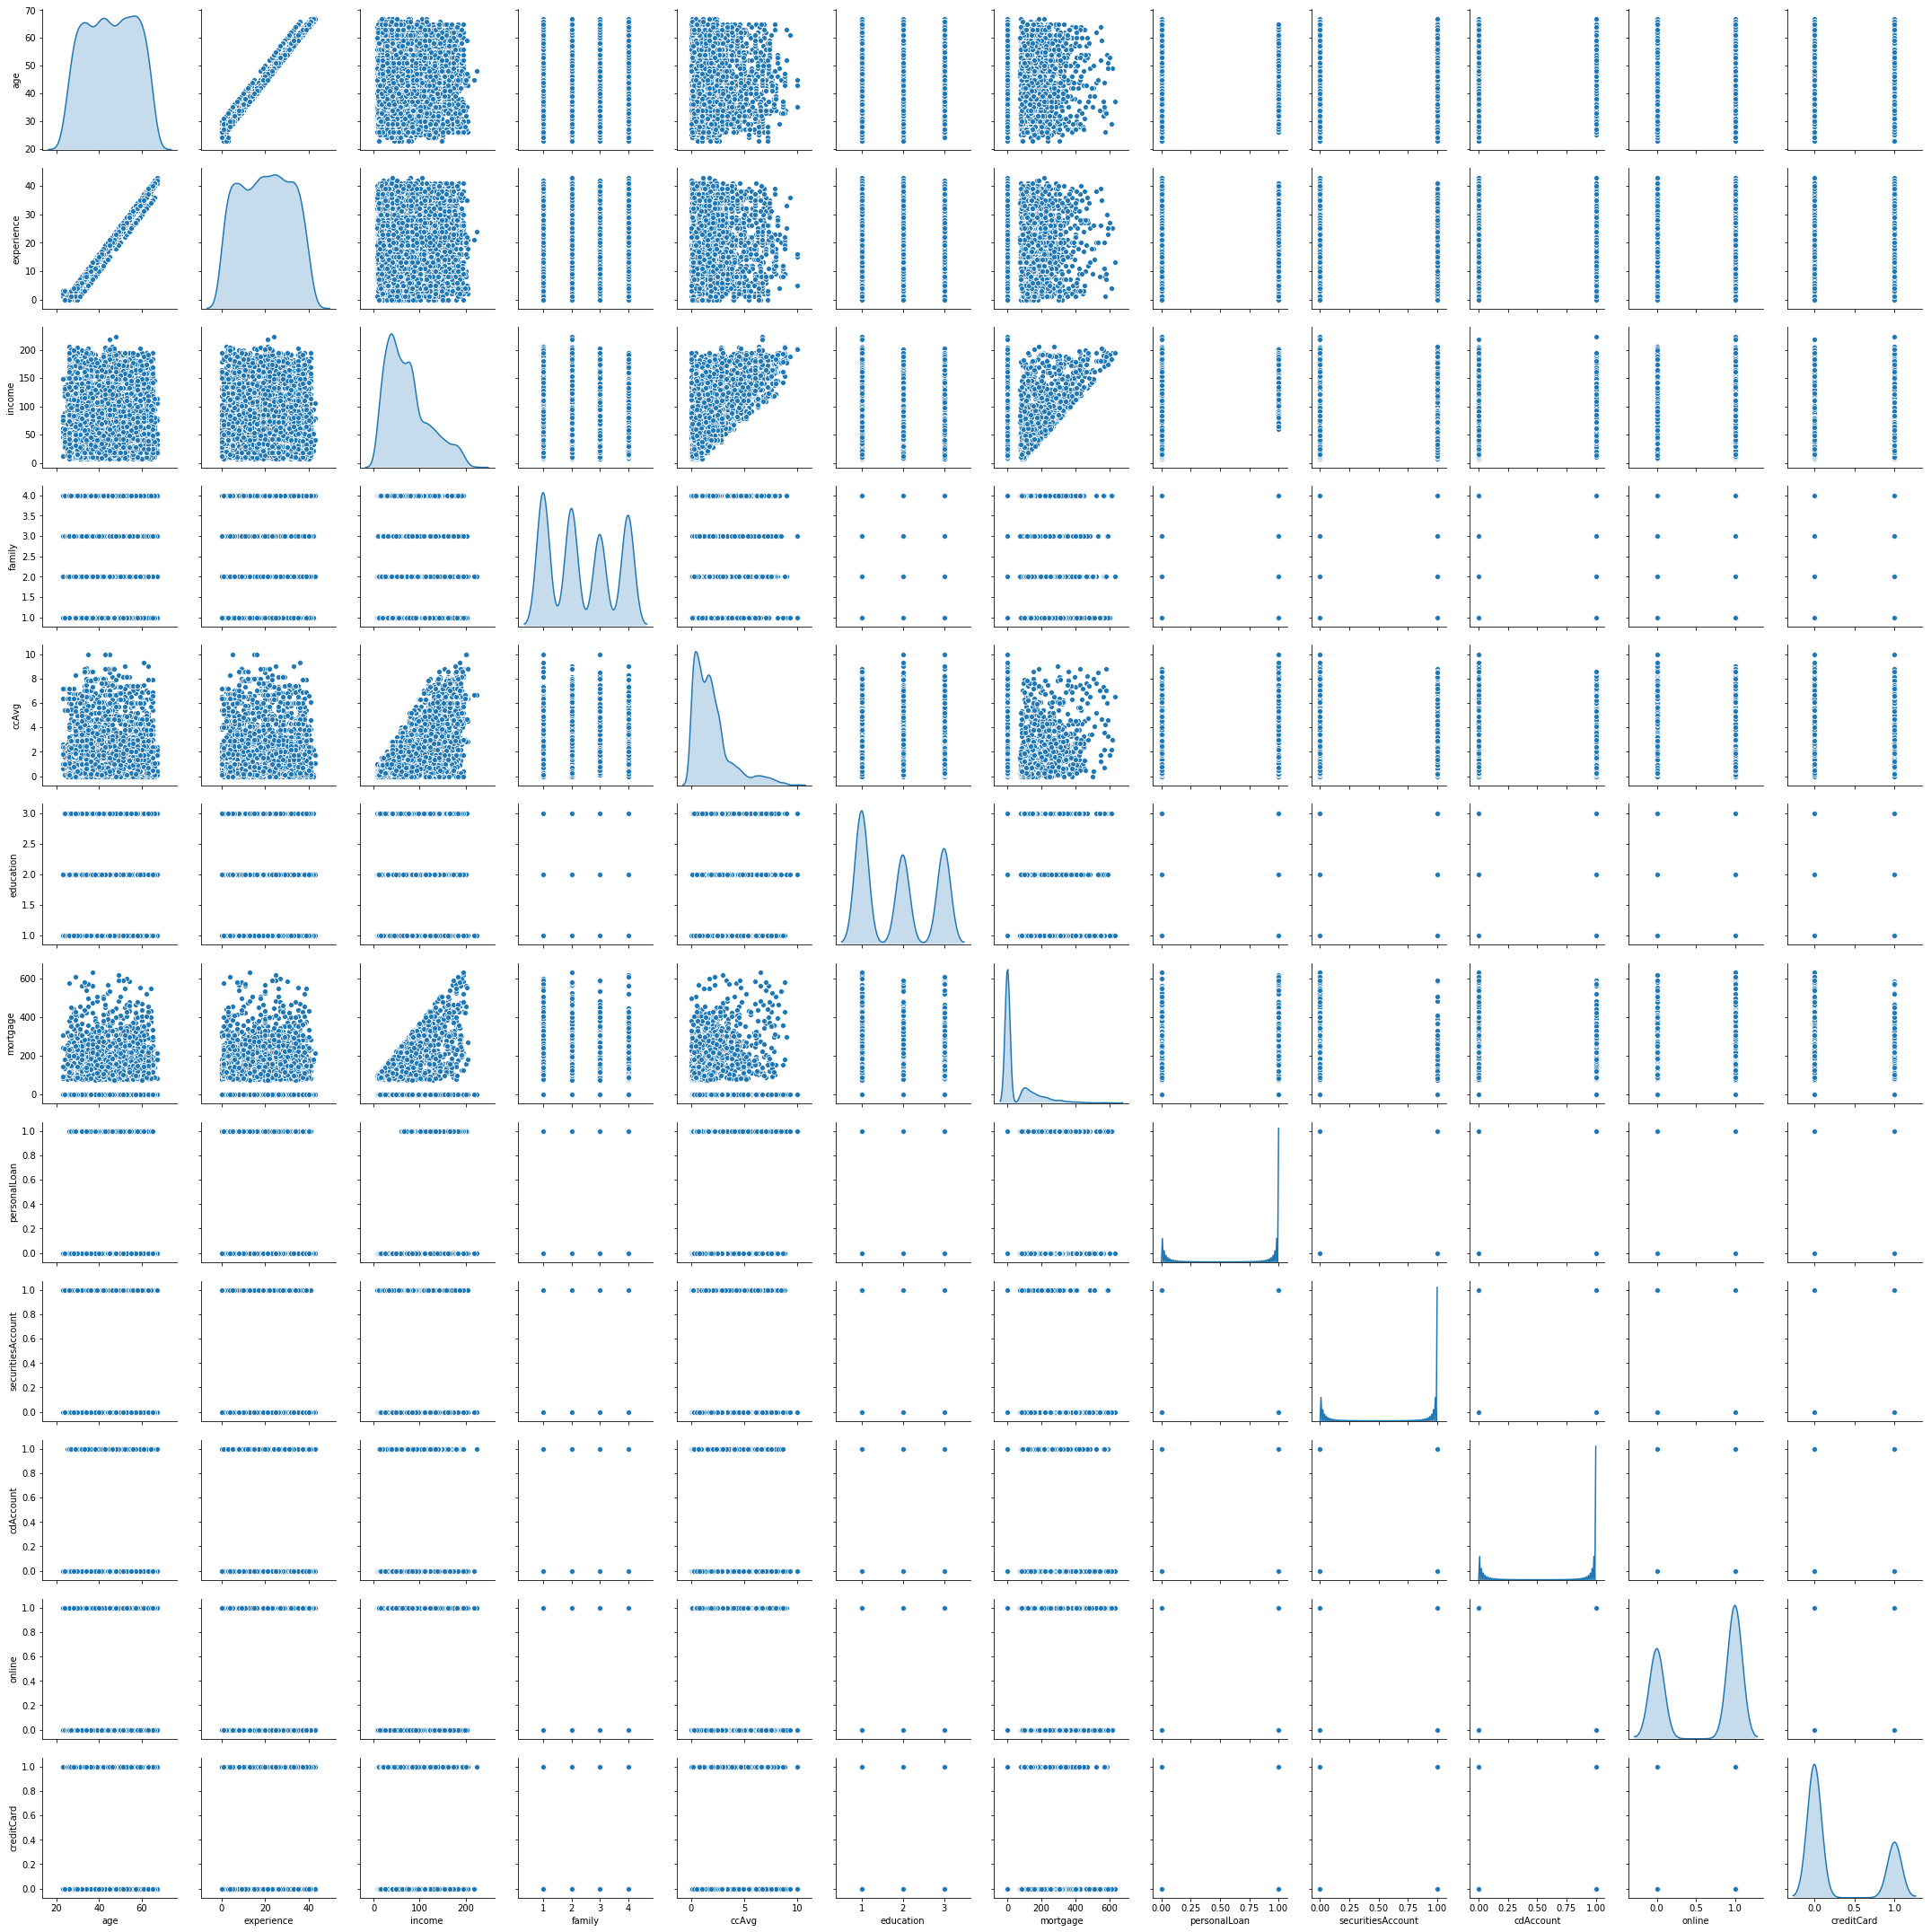

In [23]:
sns.pairplot(banking_df,diag_kind="kde")

Here PairPlot shows the linear relation between age and experience . As the age of customer increase experience also increase. Also in variable like Age and experience data is somehow normally distributed but in case of other continuous varibales like income, CCAvg and mortgage data is not normally distributed

In [24]:
# Here we have correlation matrix to know the relatoion between independent variables
banking_df.corr()

,age,experience,income,family,ccAvg,education,mortgage,personalLoan,securitiesAccount,cdAccount,online,creditCard
age,1.000000,0.993991,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
experience,0.993991,1.000000,-0.046876,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
income,-0.055269,-0.046876,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
family,-0.046418,-0.051851,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
ccAvg,-0.052012,-0.049738,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
education,0.041334,0.013919,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
mortgage,-0.012539,-0.011097,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
personalLoan,-0.007726,-0.008304,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
securitiesAccount,-0.000436,-0.000989,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
cdAccount,0.008043,0.009735,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


Indepedent columns must be independent with each others. But here we can see a relation between some independent variables like Age and experience having r value 0.99 and CCAvg and Income having r value 0.65. Rest all the variables having r value less than 0.5. Below is the graphical representation of the correlation matrix

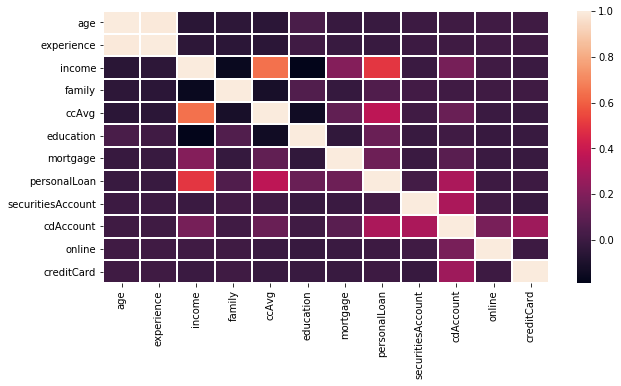

In [25]:
fig, ax = plt.subplots(figsize=(10,5))      
sns.heatmap(banking_df.corr(),linewidths=1,ax= ax)

### Data Pre-Processing

Here get_dummies option will create three separate column for undergraduate, graduate and adcanced with 0 and 1 value in each

In [26]:
banking_df=  pd.get_dummies(banking_df,columns=["education"])

In [27]:
banking_df.head(3)

,age,experience,income,family,ccAvg,mortgage,personalLoan,securitiesAccount,cdAccount,online,creditCard,label,education_1,education_2,education_3
0,25,1.0,49,4,1.6,0,0,1,0,0,0,Loan Rejected,1,0,0
1,45,19.0,34,3,1.5,0,0,1,0,0,0,Loan Rejected,1,0,0
2,39,15.0,11,1,1.0,0,0,0,0,0,0,Loan Rejected,1,0,0


### Making Independent and dependent variable separately

In [28]:
X =  banking_df.drop(labels=["personalLoan","label"],axis=1)
y = banking_df["personalLoan"]

In [29]:
print(X.shape)
print(y.shape)
print(X.columns)

(5000, 13)
(5000,)
Index(['age', 'experience', 'income', 'family', 'ccAvg', 'mortgage',
       'securitiesAccount', 'cdAccount', 'online', 'creditCard', 'education_1',
       'education_2', 'education_3'],
      dtype='object')


Here we have taken all the independent column in X and dependent column in y

## Logistic Regression

Here I am going to use Logistic regression to create model to predict the probability of the customer whether he/she will accept the Personal loan in this campaign

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logistic_model =  LogisticRegression(solver="liblinear")

In [32]:
# Splitting of Training and Testing data in 70:30 ratio respectively
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.30,random_state=101)
print("Rows and Columns in X_train " ,X_train.shape)
print("Rows and Columns in X_test " , X_test.shape)
print("Rows in y_train" , y_train.shape)
print("Rows in y_test" , y_test.shape)

Rows and Columns in X_train  (3500, 13)
Rows and Columns in X_test  (1500, 13)
Rows in y_train (3500,)
Rows in y_test (1500,)


In [33]:
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
columns = np.array(X_train.columns)
w = logistic_model.coef_
intercept =  logistic_model.intercept_
for index, name in enumerate(columns):
    print("coefficients of {} column {}".format(name,w[0][index]))
print("Intercept of Logistic Regression model",intercept)

coefficients of age column -0.2914868790263287
coefficients of experience column 0.299136470049163
coefficients of income column 0.053042488430907635
coefficients of family column 0.5350052723409101
coefficients of ccAvg column 0.15236016401355468
coefficients of mortgage column 0.001207920074158616
coefficients of securitiesAccount column -0.7246885377237615
coefficients of cdAccount column 3.4354166994897875
coefficients of online column -0.7132318722918315
coefficients of creditCard column -0.8285664304193477
coefficients of education_1 column -3.008019024871626
coefficients of education_2 column 0.5802346046614746
coefficients of education_3 column 0.7522446330810012
Intercept of Logistic Regression model [-1.67553979]


In [35]:
# Calculating Z Value for Sigmoid Function
z_value = []
for index,x_train in X_train.iterrows():
    z_value.append(np.dot(x_train.values,w.T)+intercept)

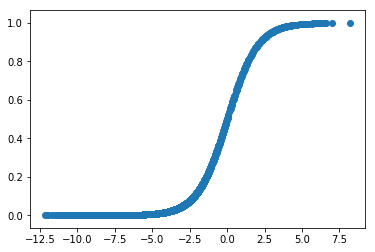

In [36]:
#sigmoid function 
sigmoid = np.exp(z_value)/(1 + np.exp(z_value))
plt.scatter(z_value,sigmoid)

In [37]:
y_prediction = logistic_model.predict(X_test)
logistic_model.score(X_test,y_test)

0.954

It shows that 95.40% of the total test records actually matches with the actual result or in other words we can say our model is 95.40 % accurate.

In [38]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,1346,8
Actual_1,61,85


In the above Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not accept the loan and is correctly predicted by the model is 1346 but those customers who did not accepted the loan and not correctly predicted by the model is 8. In the same way those customers who actally accepted the loan and correctly predicted by the model is 85 and those who accpeted the loan but incorrectly predicted by the model is 61.

In [39]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1354
           1       0.91      0.58      0.71       146

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.94      0.79      0.84      1500
weighted avg       0.95      0.95      0.95      1500



##### Calculating average score by Taking 10 different types of combination of training and test set fron the same data

In [40]:
scores = []
for i in np.arange(10):
    X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.30)
    logistic_model.fit(X_train,y_train)
    scores.append(logistic_model.score(X_test,y_test))
print("Accuracy scores of Logistic model on 10 iteration" ,scores)
print("Average Accuracy Score of Logistic model {0:.2f}%".format(np.average(scores)*100))

Accuracy scores of Logistic model on 10 iteration [0.9533333333333334, 0.9573333333333334, 0.9506666666666667, 0.9566666666666667, 0.9566666666666667, 0.9573333333333334, 0.9546666666666667, 0.9546666666666667, 0.956, 0.9586666666666667]
Average Accuracy Score of Logistic model 95.56%


### Naive Bayes

It is probabilistic model based on bayes' throrm. It is called naive due to the assumption that the features in the data set are mutually independent of each others. It estimates conditional probability about something will happen when something has already occured.

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
naive_bayes_model = GaussianNB()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)
naive_bayes_model.fit(X_train,y_train)
y_prediction = naive_bayes_model.predict(X_test)
naive_bayes_model.score(X_test,y_test)

0.8866666666666667

This model shows accuracy only 88.67% which is not a good case. Reason of this low accuracy can be the relationship between independent variable like age and experience column having r value 0.99.Another reason of this low accuracy of model can be the data that we have contains 90.4 % records of those Customers who did not accepted the laon and contain only 9.6% of the records of the customers who accepted the loan

In [43]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,1253,101
Actual_1,69,77


Again in the Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not accept the loan and is correctly predicted by this model is 1253 but those customers who did not accepted the loan and not correctly predicted by the model is 101. In the same way those customers who actally accepted the loan and correctly predicted by the model is 77 and those who accpeted the loan but incorrectly predicted by the model is 69.

In [44]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1354
           1       0.43      0.53      0.48       146

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.69      0.73      0.71      1500
weighted avg       0.90      0.89      0.89      1500



##### Calculating average score by Taking 10 different types of combination of training and test set fron the same data

In [45]:
scores = []
for i in np.arange(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)
    naive_bayes_model.fit(X_train,y_train)
    scores.append(naive_bayes_model.score(X_test,y_test))
print("Accuracy scores of Naive Bayes model on 10 iteration" ,scores)
print("Average Accuracy Score ofNaive Bayes Model {0:.2f}%".format(np.average(scores)*100))

Accuracy scores of Naive Bayes model on 10 iteration [0.906, 0.8913333333333333, 0.898, 0.868, 0.9013333333333333, 0.8973333333333333, 0.9046666666666666, 0.9073333333333333, 0.902, 0.906]
Average Accuracy Score ofNaive Bayes Model 89.82%


### K-Nearest Neighbors

K- Nearest Neighbors can be used for classification as well as regression. It is an instance based method for predicting class or value of given query. In this algorithm classification is computed from a simple majority vote of the nearest neighbors of each point. New data point is assigned to a class which has the most data points in the nearest neighbors.

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
nearest_neighbors_model = KNeighborsClassifier(n_neighbors=5,weights="distance")
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)
nearest_neighbors_model.fit(X_train,y_train)
y_prediction = nearest_neighbors_model.predict(X_test)
nearest_neighbors_model.score(X_test,y_test)

0.9126666666666666

Here our model is showing 91.27% accuracy in prediction

In [48]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,1315,39
Actual_1,92,54


Again in the Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not accept the loan and is correctly predicted by this model is 1315 but those customers who did not accepted the loan and not correctly predicted by the model is 39. In the same way those customers who actally accepted the loan and correctly predicted by the model is 54 and those who accpeted the loan but incorrectly predicted by the model is 92.

In [49]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1354
           1       0.58      0.37      0.45       146

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.76      0.67      0.70      1500
weighted avg       0.90      0.91      0.90      1500



##### Calculating average score by Taking 10 different types of combination of training and test set fron the same data

In [50]:
scores = []
for i in np.arange(10):
    X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.30)
    nearest_neighbors_model.fit(X_train,y_train)
    scores.append(nearest_neighbors_model.score(X_test,y_test))
print("Accuracy scores of K-Nearest Neighbours model on 10 iteration" ,scores)
print("Average Accuracy Score of K-Nearest Neighbours Model {0:.2f}%".format(np.average(scores)*100))

Accuracy scores of K-Nearest Neighbours model on 10 iteration [0.9226666666666666, 0.902, 0.8993333333333333, 0.8986666666666666, 0.902, 0.9086666666666666, 0.9133333333333333, 0.9086666666666666, 0.9133333333333333, 0.906]
Average Accuracy Score of K-Nearest Neighbours Model 90.75%


### Support Vector Machine

Support Vector Machine algorithm used for both classification as well as regression.  It uses technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

In [51]:
from sklearn.svm import SVC

In [52]:
svc_model =  SVC(kernel="rbf")
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 101)
svc_model.fit(X_train,y_train)
y_prediction =  svc_model.predict(X_test)
svc_model.score(X_test,y_test)

C:\Users\aman-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9066666666666666

In Support Vector Classification , our model is predicting 90.67 % accuracy

In [53]:
# Confusion Matrix
pd.DataFrame(data =metrics.confusion_matrix(y_test,y_prediction),columns=["Predicted_0","Predicted_1"],index=["Actual_0","Actual_1"])

,Predicted_0,Predicted_1
Actual_0,1353,1
Actual_1,139,7


In the Confustion Matrix rows are representing Actuals and Columns are representing predicted with 0 and 1 . Here Total No. of Customers who did not accept the loan and is correctly predicted by this model is 1353 but those customers who did not accepted the loan and not correctly predicted by the model is 1. In the same way those customers who actally accepted the loan and correctly predicted by the model is only 7 and those who accpeted the loan but incorrectly predicted by the model is 139 which is a huge number.

In [54]:
print(metrics.classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1354
           1       0.88      0.05      0.09       146

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.89      0.52      0.52      1500
weighted avg       0.90      0.91      0.87      1500



##### Calculating average score by Taking 10 different types of combination of training and test set fron the same data

In [55]:
scores = []
svc_model =  SVC(kernel="rbf",gamma="auto")
for i in np.arange(10):
    X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.30)
    svc_model.fit(X_train,y_train)
    scores.append(svc_model.score(X_test,y_test))
print("Accuracy scores of Support Vector Classification model on 10 iteration" ,scores)
print("Average Accuracy Score of Support Vector Classification Model {0:.2f}%".format(np.average(scores)*100))

Accuracy scores of Support Vector Classification model on 10 iteration [0.9053333333333333, 0.8966666666666666, 0.8986666666666666, 0.9026666666666666, 0.9026666666666666, 0.9113333333333333, 0.9033333333333333, 0.9113333333333333, 0.9073333333333333, 0.9126666666666666]
Average Accuracy Score of Support Vector Classification Model 90.52%


<h3>Conclusion</h3>
In all above machine learning model , Logistic regression is providing better accuracy score of 95.4% but If we go for their recall percentage for class 1, it is just 58% which is not representing a good prediction model. The reason for this low value of recall precentage  is the data that we have contains only 480(9.6%) records out of 5000 records related to class 1 and rest 4520 records related to class 0. 